<a href="https://colab.research.google.com/github/IvanGoyena/CURSO-DATA-SCIENCE/blob/main/ENTREGA/ProyectoDSParte1_IvanGoyena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Visualizaciones en Python - Ivan Goyena

# **Abstract ⚛**

El presente trabajo tiene como objetivo realizar un análisis exploratorio y visual del dataset "taco_sales_(2024-2025).csv", el cual contiene información detallada sobre ventas de tacos a lo largo de los años 2024 y 2025. El dataset incluye variables relacionadas con fechas, tipos de productos, precios, cantidades vendidas, y otros atributos asociados a la operación comercial de una taquería.

La motivación detrás de este análisis surge de la necesidad de comprender patrones de consumo, identificar productos estrella, evaluar comportamientos estacionales, y detectar posibles oportunidades de mejora en la estrategia de ventas.

A través de visualizaciones y análisis estadísticos, se busca responder a preguntas clave sobre las ventas, como la relación entre el tipo de taco y las ventas, así como las variaciones en las ventas a lo largo del tiempo.

Se espera proporcionar insights que no solo sean informativos, sino también prácticos para la toma de decisiones.

# **Preguntas e Hipotesis** ❓


¿Qué tipo de taco se vende más y qué factores influyen en su éxito?

¿Existen variaciones estacionales o mensuales en la cantidad de ventas?

¿El precio influye significativamente en la cantidad vendida de cada producto?

¿Cuáles son los días de mayor volumen de ventas?

¿Qué combinación de variables explica mejor los ingresos generados?

¿Que estado es el que contiene mayor cantidad de ventas?

# Objetivo del proyecto



# **URL** del CSV

In [133]:
URL = 'https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv'

# Importacion de liberarias y archivo CSV

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(URL)
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


## Informacion del database

In [135]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


,Order ID,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,552504.865000,50.93000,2.529000,13.073420,6.908250,1.806110
std,255948.779709,23.22754,1.717005,7.142268,2.310137,1.132035
min,101139.000000,10.00000,0.000000,0.510000,3.000000,0.010000
25%,331796.750000,30.00000,1.000000,6.972500,4.500000,0.907500
50%,559740.000000,53.00000,3.000000,13.200000,6.750000,1.760000
75%,771781.750000,71.00000,4.000000,19.242500,9.250000,2.520000
max,999138.000000,90.00000,5.000000,24.980000,10.750000,4.980000


# Transformaciones Realizadas ⛏

### Agregado columna Cantidad

In [136]:
df['Cantidad'] = 1

### Transformacion del campo "Order Time" al formato Fecha

In [137]:
df['Order Time'] = pd.to_datetime(df['Order Time'].astype(str), format="%d-%m-%Y %H:%M", errors='coerce')

In [138]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Cantidad
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,1
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,1
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False,1
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,1
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False,1


# Graficos y Visualizaciones 🌮

### Grafico de barras x Tipo de Taco

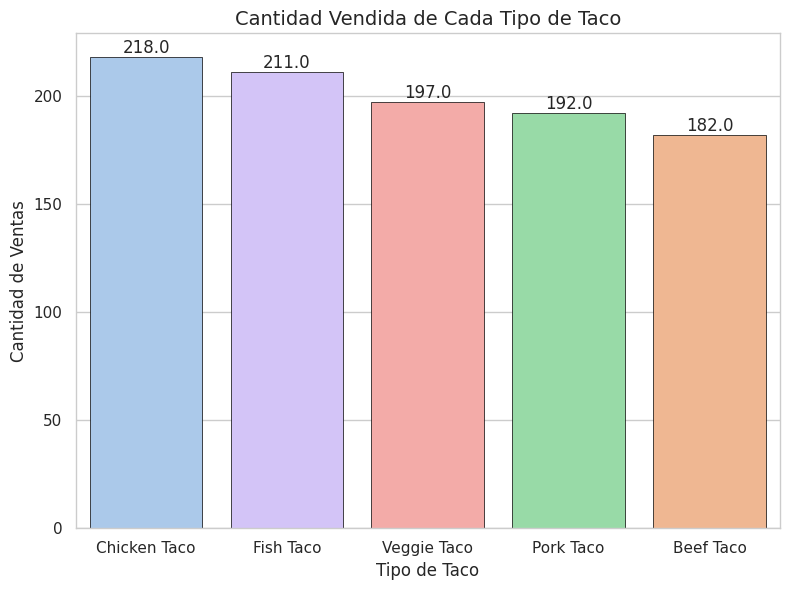

In [139]:
plt.figure(figsize=(8, 6))

order = df['Taco Type'].value_counts().index

sns.set_style("whitegrid")
ax = sns.countplot(
    x='Taco Type',
    data=df,
    order=order,
    hue='Taco Type',
    palette="pastel",
    edgecolor='black',
    legend=False
)
plt.title('Cantidad Vendida de Cada Tipo de Taco', fontsize=14)
plt.xlabel('Tipo de Taco', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()


## Top 10 Ventas x Estado

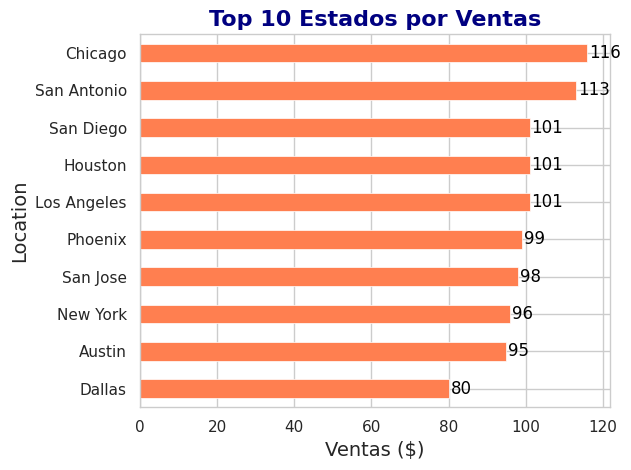

In [141]:
ax = df.groupby("Location")["Order ID"].count().sort_values(ascending=False).head(10).plot(
    kind='barh', color='coral'
)

ax.set_title("Top 10 Estados por Ventas", fontsize=16, fontweight='bold', color='navy')
ax.set_xlabel("Ventas ($)", fontsize=14)
ax.set_ylabel("Location", fontsize=14)

ax.invert_yaxis()

for i, v in enumerate(ax.containers[0]):
    ax.text(v.get_width() + 0.5, v.get_y() + v.get_height()/2,
            str(int(v.get_width())), va='center', fontsize=12, color='black')

plt.style.use('ggplot')

plt.tight_layout()
plt.show()

